# Antwoorden — Iris classificatie

Dit notebook bevat een volledige uitwerking van de oefening in `exercises/01_Iris_Classificatie_Opdracht.ipynb`.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

np.random.seed(42)

In [2]:
iris = load_iris()
X = iris.data
y = iris.target

print('Aantal voorbeelden:', len(X))
print('Aantal features:', X.shape[1])
print('Klassen:', iris.target_names)

Aantal voorbeelden: 150
Aantal features: 4
Klassen: ['setosa' 'versicolor' 'virginica']


In [3]:
X_train, X_temp, y_train, y_temp = train_test_split(
    X, y, test_size=0.40, random_state=42, stratify=y
)
X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=0.50, random_state=42, stratify=y_temp
)

print('Train:', len(X_train))
print('Validation:', len(X_val))
print('Test:', len(X_test))

Train: 90
Validation: 30
Test: 30


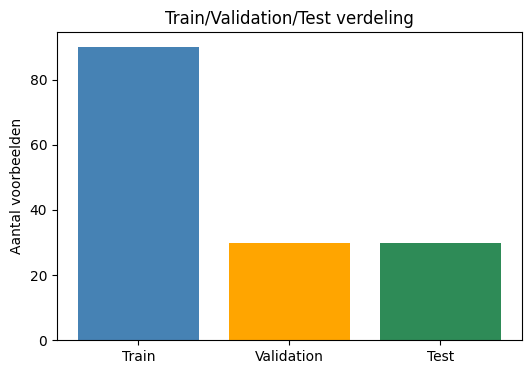

In [4]:
namen = ['Train', 'Validation', 'Test']
groottes = [len(X_train), len(X_val), len(X_test)]

plt.figure(figsize=(6, 4))
plt.bar(namen, groottes, color=['steelblue', 'orange', 'seagreen'])
plt.title('Train/Validation/Test verdeling')
plt.ylabel('Aantal voorbeelden')
plt.show()

In [5]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

Beste k: 1


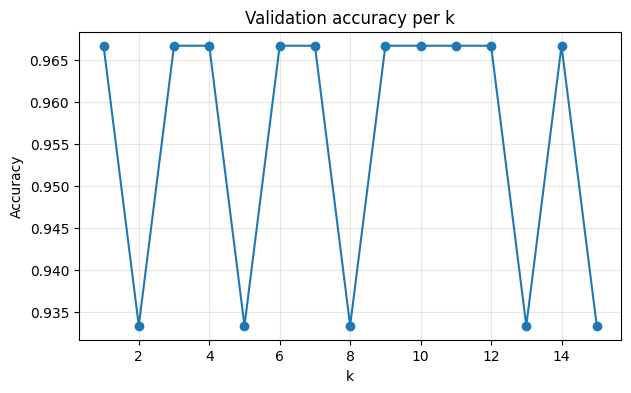

In [6]:
k_values = range(1, 16)
val_scores = []

for k in k_values:
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train_scaled, y_train)
    pred = model.predict(X_val_scaled)
    val_scores.append(accuracy_score(y_val, pred))

best_k = list(k_values)[int(np.argmax(val_scores))]
print('Beste k:', best_k)

plt.figure(figsize=(7, 4))
plt.plot(list(k_values), val_scores, marker='o')
plt.title('Validation accuracy per k')
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.grid(alpha=0.3)
plt.show()

In [7]:
final_model = KNeighborsClassifier(n_neighbors=best_k)
final_model.fit(X_train_scaled, y_train)
test_pred = final_model.predict(X_test_scaled)

print('Test accuracy:', round(accuracy_score(y_test, test_pred), 3))
print()
print(classification_report(y_test, test_pred, target_names=iris.target_names))

cm = confusion_matrix(y_test, test_pred)
print('Confusion matrix:\n', cm)

Test accuracy: 0.933

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       0.83      1.00      0.91        10
   virginica       1.00      0.80      0.89        10

    accuracy                           0.93        30
   macro avg       0.94      0.93      0.93        30
weighted avg       0.94      0.93      0.93        30

Confusion matrix:
 [[10  0  0]
 [ 0 10  0]
 [ 0  2  8]]


### Uitleg Confusion Matrix (Iris)

Zo lees je de matrix:

- **Rijen** = de echte soort bloem.
- **Kolommen** = wat het model voorspelde.
- Getallen op de **diagonaal** (linksboven naar rechtsonder) zijn correct.
- Getallen **buiten de diagonaal** zijn vergissingen tussen soorten.

Voorbeeld: als in rij `virginica` en kolom `versicolor` een getal staat, dan heeft het model een virginica fout als versicolor voorspeld.

## Belangrijk leerpunt

Je ziet hier een complete mini-ML workflow:
- dataset laden
- train/validation/test split
- modelselectie via validation
- eerlijke evaluatie op test

Dit patroon herhaal je later ook bij neural networks.